<a href="https://colab.research.google.com/github/Luesierrape/Curso-IA-Udea/blob/main/LAB_07_02_NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 07.02 - Neural networks

In [143]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


In [144]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L07.02", varname="student");

logging in as luesierrape@unal.edu.co... please wait
using course session ai4eng.v1::open
success!! you are logged in


In [145]:
import numpy as np
from IPython.display import Image
try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass

import tensorflow as tf

Using TF2 in Google Colab


## Task 1. Compute softmax output

You have a classification problem with $n_c$ classes. You have a dataset of $m$ elements and you are given:


- $\hat{\mathbf{y}} \in \mathbb{R}^{m\times n_c}$, the **logits** of the output layer of a neural network

compute $\hat{\bar{\mathbf{y}}}$ the softmax output corresponding the given **logits**, as explained in the notes.

**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**CHALLENGE**: Use a single line of Python code

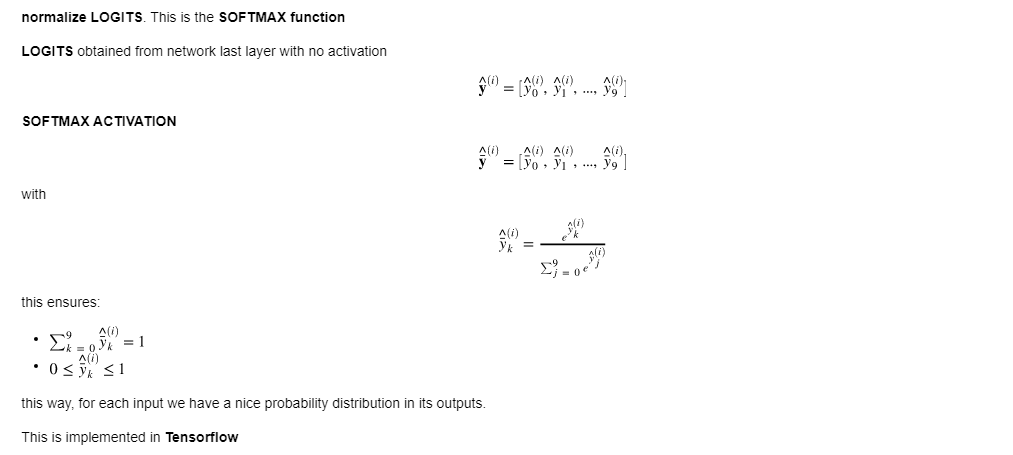

In [148]:
def softmax(y_hat):
    y_shat = np.exp(y_hat)/(np.sum(np.exp(y_hat),1)).reshape(-1,1)
    return y_shat

check your code against Tensorflow. Your answer must be exactly the same

In [149]:

m = np.random.randint(10)+10
nc = np.random.randint(5)+5
y_hat = np.round(np.random.normal(size=(m,nc)), 2)
y_hat

array([[ 1.17, -0.  , -0.25, -1.71,  0.4 ,  0.46,  0.06],
       [ 1.35, -0.92,  0.36,  1.66, -0.06, -0.19,  0.7 ],
       [-0.71, -2.24,  0.74,  0.37,  0.27,  0.13,  0.49],
       [-0.81, -0.6 , -0.74,  0.09, -1.22, -0.73,  1.47],
       [ 1.55, -1.52,  1.88,  0.77, -0.63, -2.01, -0.68],
       [-0.43, -1.46,  1.58,  0.01,  0.48,  0.84,  0.55],
       [ 1.53, -0.15,  1.31,  0.76, -0.73, -0.98,  0.66],
       [-0.73, -2.65,  0.2 ,  1.46,  0.43,  0.46,  0.42],
       [ 0.28, -0.37,  1.37, -0.52, -0.43, -0.4 ,  0.32],
       [-0.85, -0.46,  1.73, -0.35, -0.94, -1.09,  0.4 ],
       [ 0.86,  1.21, -0.96, -0.86,  0.  ,  0.53,  0.02],
       [-0.77,  1.09,  0.56,  0.73,  1.54, -2.11, -0.04],
       [ 1.87, -2.44,  0.98,  1.11,  1.14, -0.32, -1.11],
       [ 0.68, -0.42, -0.34, -1.42, -2.72, -2.4 , -1.53],
       [-0.69,  0.68,  0.14,  0.31, -2.19, -1.58,  0.9 ],
       [ 0.8 , -0.71, -1.32,  0.15,  0.36,  0.13, -0.42],
       [ 0.05,  2.15,  0.25,  1.03, -1.17,  0.18,  1.06]])

In [150]:
my_output = softmax(y_hat)
my_output

array([[0.34572983, 0.10730311, 0.08356775, 0.01940746, 0.16007743,
        0.16997606, 0.11393836],
       [0.2618566 , 0.02705298, 0.09729981, 0.35702186, 0.06393053,
        0.05613711, 0.13670113],
       [0.05978977, 0.01294662, 0.25489063, 0.17606171, 0.15930722,
        0.13849504, 0.19850902],
       [0.05783888, 0.07135456, 0.06203268, 0.1422607 , 0.03838479,
        0.06265611, 0.56547228],
       [0.31798483, 0.01476122, 0.44230677, 0.14576616, 0.03594549,
        0.00904311, 0.03419241],
       [0.05240359, 0.01870845, 0.39110461, 0.08136743, 0.13018741,
        0.18660145, 0.13962707],
       [0.32717416, 0.06097675, 0.26256341, 0.15148591, 0.03414078,
        0.02658887, 0.13707012],
       [0.04494072, 0.00658862, 0.11390266, 0.40155488, 0.14335789,
        0.14772378, 0.14193145],
       [0.14316965, 0.07474111, 0.42582577, 0.06433027, 0.07038853,
        0.07253218, 0.14901251],
       [0.04441732, 0.06560352, 0.58618145, 0.07323177, 0.04059437,
        0.0349399 , 0.1

In [151]:
tf_output = tf.nn.softmax(y_hat).numpy()
tf_output

array([[0.34572983, 0.10730311, 0.08356775, 0.01940746, 0.16007743,
        0.16997606, 0.11393836],
       [0.2618566 , 0.02705298, 0.09729981, 0.35702186, 0.06393053,
        0.05613711, 0.13670113],
       [0.05978977, 0.01294662, 0.25489063, 0.17606171, 0.15930722,
        0.13849504, 0.19850902],
       [0.05783888, 0.07135456, 0.06203268, 0.1422607 , 0.03838479,
        0.06265611, 0.56547228],
       [0.31798483, 0.01476122, 0.44230677, 0.14576616, 0.03594549,
        0.00904311, 0.03419241],
       [0.05240359, 0.01870845, 0.39110461, 0.08136743, 0.13018741,
        0.18660145, 0.13962707],
       [0.32717416, 0.06097675, 0.26256341, 0.15148591, 0.03414078,
        0.02658887, 0.13707012],
       [0.04494072, 0.00658862, 0.11390266, 0.40155488, 0.14335789,
        0.14772378, 0.14193145],
       [0.14316965, 0.07474111, 0.42582577, 0.06433027, 0.07038853,
        0.07253218, 0.14901251],
       [0.04441732, 0.06560352, 0.58618145, 0.07323177, 0.04059437,
        0.0349399 , 0.1

In [152]:
np.allclose(my_output, my_output)

True

**submit your code**

In [70]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Compute cross entropy

you are also given

- $\mathbf{y}$, a vector of $m$ elements, each elemet being an integer between $0$ and $n_c-1$, corresponding to the labels of your dataset.

Complete the following function to compute cross entropy as explained in the notes. Observe that you are given:

- $\mathbf{y}$ with the original class labels. You will have to convert it to a one hot encoding.
- $\hat{\bar{\mathbf{y}}}$ the softmax activations such as from the output on your previous function

**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**SUGGESTION**: Use `np.log(expression+1e-10)` for any `expression` better than `np.log(expression)` since this will avoid numeric errors if `expression` evaluates to 0. Recall that `1e-10` is $10^{-10}$

**CHALLENGE**: Use a single line of Python code

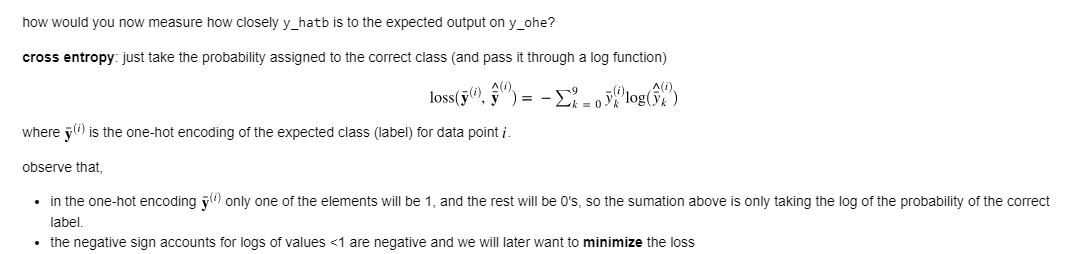

In [153]:
def cross_entropy(y, y_hatb):
    loss = -np.sum((np.eye(y_hatb.shape[1])[y].astype(int))*(np.log(y_hatb + 1e-10)),1)
    return loss

check your answer against **Tensorflow** corresponding implementation

In [154]:
m = np.random.randint(10)+10
nc = np.random.randint(5)+5

y = np.random.randint(nc, size=m)
y_hatb = np.random.random(size=(m, nc))
y_hatb /= np.sum(y_hatb, axis=1).reshape(-1,1)

print (y)
print (y_hatb)
print (y_hatb.sum(axis=1))
np.eye(y_hatb.shape[1])[y].astype(int)

[7 0 7 4 3 0 1 5 2 8 6 7 0 1 4]
[[0.13816484 0.06399878 0.04311936 0.21209853 0.0886432  0.00719089
  0.04147516 0.13872905 0.26658018]
 [0.11218998 0.00620005 0.04702021 0.14223257 0.15285605 0.17783056
  0.13165554 0.1500836  0.07993144]
 [0.01199223 0.05685675 0.14018138 0.19267206 0.01159661 0.17939064
  0.15292715 0.10943465 0.14494853]
 [0.06628521 0.03756212 0.2438416  0.1131691  0.10465019 0.11718547
  0.02218347 0.11566991 0.17945293]
 [0.09308775 0.02295289 0.15204958 0.114139   0.1603473  0.16363107
  0.15028434 0.08218469 0.06132339]
 [0.15851577 0.06956638 0.08673598 0.00724219 0.10919513 0.17314797
  0.09961505 0.1111114  0.18487012]
 [0.20780777 0.14118308 0.01431494 0.10350361 0.05973807 0.19293202
  0.03619937 0.09180602 0.15251513]
 [0.02943705 0.07728715 0.21732656 0.07579067 0.04069574 0.20628701
  0.11399802 0.17392119 0.06525662]
 [0.05992193 0.22284661 0.19084963 0.07296732 0.13400767 0.06686943
  0.01603599 0.06454661 0.17195482]
 [0.12679469 0.12988838 0.052712

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [155]:
cross_entropy(y, y_hatb)

array([1.97523254, 2.18756155, 2.21242772, 2.25713206, 2.17033831,
       1.84190119, 1.95769779, 1.57848684, 1.65626945, 1.99230745,
       1.78111093, 2.24715235, 4.28254424, 2.12038814, 2.23409993])

In [156]:
tf.keras.losses.sparse_categorical_crossentropy(y, y_hatb).numpy()

array([1.97523254, 2.18756155, 2.21242772, 2.25713206, 2.17033831,
       1.84190119, 1.95769779, 1.57848685, 1.65626945, 1.99230745,
       1.78111093, 2.24715235, 4.28254424, 2.12038814, 2.23409993])

**submit your code**

In [142]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Compute multilayer perceptron network output

You have 

- a dataset of $m$ elements and $n$ columns.
- a classification problem with $n_c$ classes. 

And we build a multilayer perceptron with 
- two hidden layers with $h_1$ and $h_2$ neurons respectively and **tanh** activation.
- one output layer with $n_c$ neurons with **softmax** activation.

so that we have the following architecture

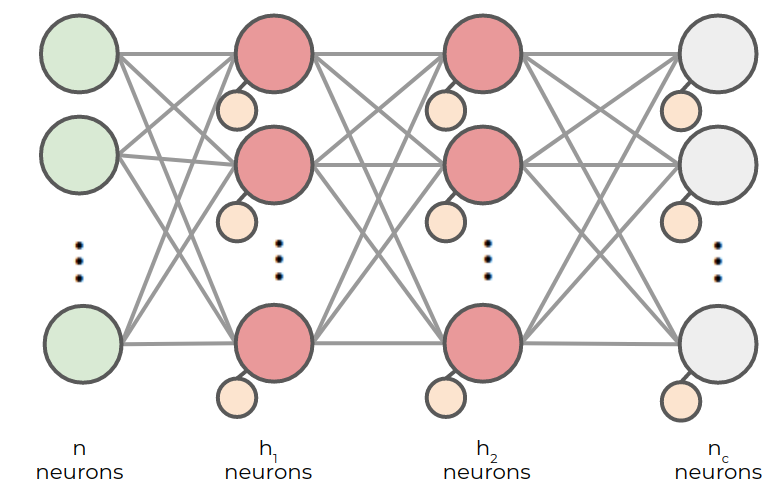

In [ ]:

Image("local/imgs/labmlp.png", width=500)


This way, we have the following set of weights:

- $W_0 \in \mathbb{R}^{n\times h_1}$ 
- $b_0 \in \mathbb{R}^{h_1}$ 


- $W_1 \in \mathbb{R}^{h1\times h_2}$ 
- $b_1 \in \mathbb{R}^{h_2}$ 


- $W_2 \in \mathbb{R}^{h2\times n_c}$ 
- $b_2 \in \mathbb{R}^{n_c}$ 

Complete the function below so that it produces the following output:

$$\text{softmax}(\text{tanh}(\text{tanh}(\mathbf{X}\cdot\mathbf{W}_0+b_0)\cdot\mathbf{W}_1+b_1)\cdot\mathbf{W}_0+b_0)$$


**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**CHALLENGE**: Use a single line of Python code (not counting your previous `softmax` function).

In [173]:
def nn_output(X, W0, b0, W1, b1, W2, b2):
    def softmax(y_hat):
      y_shat = np.exp(y_hat)/(np.sum(np.exp(y_hat),1)).reshape(-1,1)
      return y_shat
        
    #return softmax(np.dot(np.tanh(np.dot(np.tanh(np.dot(X,W0)+b0),W1) + b1),W0) + b0) # YOUR CODE HERE0
    return softmax(np.dot(np.tanh(np.dot(np.tanh(np.dot(X,W0) + b0),W1) + b1),W2) + b2)

check your code with random input and weights against the implementation in **Tensorflow**

In [ ]:
m = np.random.randint(10)+10
n = np.random.randint(3)+3
nc = np.random.randint(5)+5

m = 10
n = 3
nc = 4

h1 = np.random.randint(5)+5
h2 = np.random.randint(5)+5

print (m,n,nc)

X = np.random.normal(size=(m,n))
W0 = np.random.normal(size=(n,h1))
b0 = np.random.normal(size=h1)
W1 = np.random.normal(size=(h1,h2))
b1 = np.random.normal(size=h2)
W2 = np.random.normal(size=(h2,nc))
b2 = np.random.normal(size=nc)


your function output

In [175]:
nn_output(X, W0, b0, W1, b1, W2, b2)

array([[0.1111816 , 0.60917027, 0.12532102, 0.15432711],
       [0.11525175, 0.60714131, 0.12881759, 0.14878934],
       [0.19295112, 0.36254509, 0.30697901, 0.13752477],
       [0.06810016, 0.59947225, 0.25400973, 0.07841786],
       [0.10770138, 0.57833933, 0.14657292, 0.16738637],
       [0.11359192, 0.61077298, 0.1261971 , 0.149438  ],
       [0.1261452 , 0.54751645, 0.16825657, 0.15808178],
       [0.0744016 , 0.55707164, 0.20972391, 0.15880285],
       [0.09831137, 0.61509592, 0.13213865, 0.15445407],
       [0.04988179, 0.6125352 , 0.17853292, 0.15905009]])

In [176]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(h1, activation='tanh', dtype=tf.float64),
    tf.keras.layers.Dense(h2, activation='tanh', dtype=tf.float64),
    tf.keras.layers.Dense(nc, activation='softmax', dtype=tf.float64)
])
model.build(input_shape=[None, n])
model.set_weights([W0, b0, W1, b1, W2, b2])

tensorflow output (must be exactly as yours)

In [177]:
model(X).numpy()

array([[0.1111816 , 0.60917027, 0.12532102, 0.15432711],
       [0.11525176, 0.60714131, 0.12881759, 0.14878934],
       [0.19295112, 0.36254509, 0.30697902, 0.13752477],
       [0.06810017, 0.59947225, 0.25400972, 0.07841786],
       [0.10770138, 0.57833933, 0.14657292, 0.16738637],
       [0.11359192, 0.61077298, 0.1261971 , 0.149438  ],
       [0.1261452 , 0.54751645, 0.16825657, 0.15808178],
       [0.0744016 , 0.55707163, 0.20972391, 0.15880285],
       [0.09831137, 0.61509592, 0.13213865, 0.15445407],
       [0.04988179, 0.6125352 , 0.17853292, 0.15905009]])

**submit your code**

In [178]:
student.submit_task(globals(), task_id="task_03");